In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from datetime import datetime
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail =  pd.read_csv("Retail.csv", delimiter= ",")
retail.isnull().sum()

InvoiceNo      0
InvoiceDate    0
StockCode      0
Quantity       0
dtype: int64

In [3]:
len(retail)

181247

In [4]:
SKUcode =  pd.read_csv("KEY_SKU.csv", delimiter= ",")
SKUcode.isnull().sum()

Product SKU    0
StockCode      0
dtype: int64

In [5]:
retail_sku = pd.merge(retail,SKUcode,how='inner',on='StockCode')

In [6]:
len(retail_sku)

181247

In [7]:
retail_sku.head(3)

,InvoiceNo,InvoiceDate,StockCode,Quantity,Product SKU
0,536598,2017-01-01,21421,1,GGOENEBQ079099
1,536999,2017-01-02,21421,1,GGOENEBQ079099
2,537137,2017-01-04,21421,2,GGOENEBQ079099


In [8]:
online =  pd.read_csv("Online_retail.csv", delimiter= ",")
online.isnull().sum()

Transaction ID                                0
Date                                          0
Product SKU                                   0
Product                                       0
Product Category (Enhanced E-commerce)        0
Quantity                                      0
Avg. Price                                    0
Revenue                                       0
Tax                                           0
Delivery                                      0
Unnamed: 10                               54138
Unnamed: 11                               54138
dtype: int64

In [9]:
from datetime import datetime
online[['NewDate']] = online[['Date']].applymap(str).applymap(lambda s: "{}/{}/{}".format(s[4:6],s[6:], s[0:4]))

online['OrderDate'] = pd.to_datetime(online['NewDate'])

Online_Merge = online[['OrderDate','Product SKU', 'Product','Product Category (Enhanced E-commerce)']]
Online_Merge.to_csv("Online_Merge.csv")

In [10]:
online.to_csv("Online_Ana.csv")

In [11]:
online_merge =  pd.read_csv("Online_Merge.csv", delimiter= ",")
retail_online = retail_sku
retail_online['OrderDate'] = pd.to_datetime(retail_online['InvoiceDate'])
#retail_online = pd.merge(retail,online_merge,how='left')

In [12]:
retail_sku.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181247 entries, 0 to 181246
Data columns (total 6 columns):
InvoiceNo      181247 non-null int64
InvoiceDate    181247 non-null object
StockCode      181247 non-null int64
Quantity       181247 non-null int64
Product SKU    181247 non-null object
OrderDate      181247 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 9.7+ MB


In [13]:
retail_sku['OrderDate'] = pd.to_datetime(retail_sku['InvoiceDate'])
product = retail_sku.groupby('OrderDate')['Quantity'].sum().reset_index()

In [14]:
product = product.set_index('OrderDate')
product.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09',
               '2017-01-11', '2017-01-12',
               ...
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-31'],
              dtype='datetime64[ns]', name='OrderDate', length=292, freq=None)

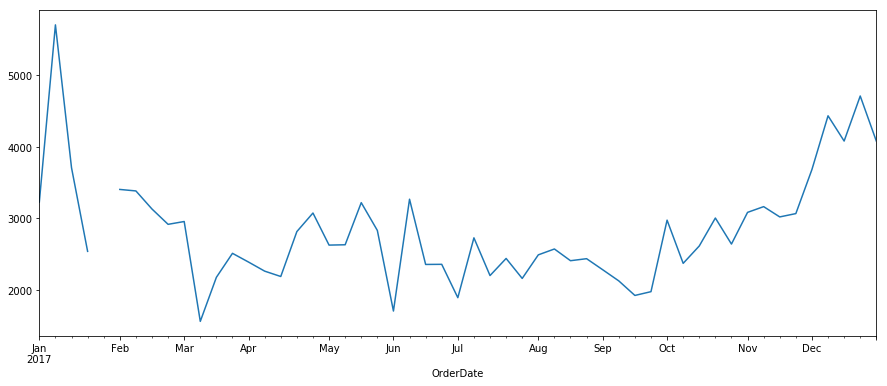

In [15]:
y = product['Quantity'].resample('W').mean()
y.plot(figsize=(15, 6))
plt.show()

In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:961.0949531093397
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:724.0589980517395
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:672.8249058951744


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1306.4861682233532
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:690.7726035847495
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:664.2687930814755
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:483.0518654328289
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1327.299282933049
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:891.068363168138
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:673.1708395393622
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:629.894750172057


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1202.1213720501737
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:675.1301973639897
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:629.0397533031392
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:472.4224792734196


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1408.6990097749112
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:788.0216631841528
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:602.2270190419057
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:625.3667411772831
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1114.09995857229
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:616.3328293355164
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:602.4756968961848
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:442.6827829646985


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1063.268197738959
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:758.7217281080706
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:578.9643150692816
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:599.1226626493158
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1061.8314175167527
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:607.2128932571164
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:580.3510812730125
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:438.8891993218794
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1061.6732852805646
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:818.3018212110085
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:618.8524551454332
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:648.8229881374539
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:967.1902006751492
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:618.3306740232813
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:620.2316642232254
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:442.9537747900018


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1322.091692704876
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:783.1709135688756
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:593.63921545199
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:613.3407000658091


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1105.097793679302
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:607.6250601896262
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:594.5616599609547
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:440.75931553982684


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1273.2334797225292
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:780.443219223202
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:593.929290060007
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:620.0299158343944


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1038.971758383254
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:592.6325179267931
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:594.4552284512961
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:425.1599936715726
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1013.061891094219
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:760.7000032902334
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:580.084966164147
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:600.4414764271434


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1074.4052125577657
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:593.2106103778458
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:581.3059892896165
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:425.6646813935964
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1058.560329022493


C:\Users\shwts\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0668      0.113      9.400      0.000       0.844       1.289
ma.L1         -0.6073      0.256     -2.376      0.017      -1.108      -0.106
ar.S.L12      -0.0079      0.190     -0.042      0.967      -0.379       0.364
sigma2      3.303e+05   9.91e+04      3.335      0.001    1.36e+05    5.25e+05


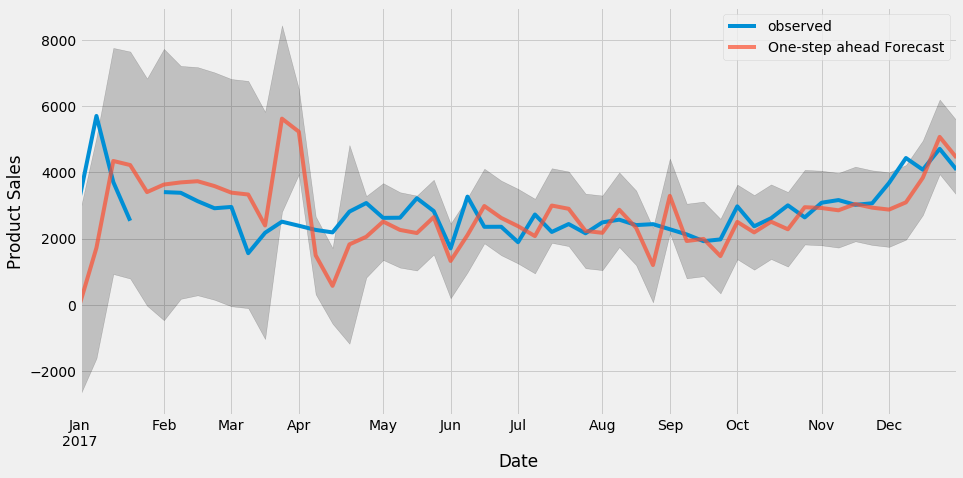

In [20]:
#Validating forecasts
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

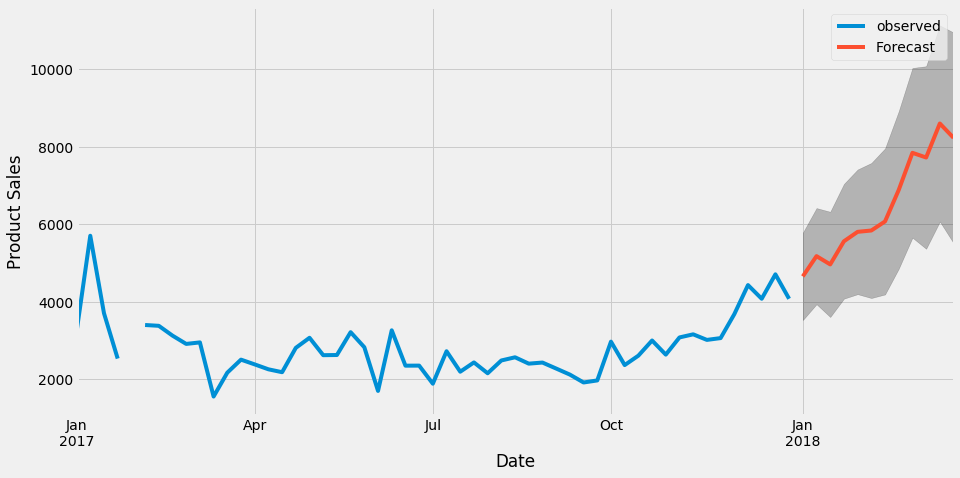

In [21]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Sales')
plt.legend()
plt.show()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1316567.84


In [23]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1147.42


In [24]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54139 entries, 0 to 54138
Data columns (total 14 columns):
Transaction ID                            54139 non-null int64
Date                                      54139 non-null int64
Product SKU                               54139 non-null object
Product                                   54139 non-null object
Product Category (Enhanced E-commerce)    54139 non-null object
Quantity                                  54139 non-null int64
Avg. Price                                54139 non-null float64
Revenue                                   54139 non-null float64
Tax                                       54139 non-null float64
Delivery                                  54139 non-null float64
Unnamed: 10                               1 non-null float64
Unnamed: 11                               1 non-null float64
NewDate                                   54139 non-null object
OrderDate                                 54139 non-null datetim

In [25]:
online_ml = online

In [26]:
online_ml = online_ml.groupby(['OrderDate'],as_index=False).sum()

In [27]:
online_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 10 columns):
OrderDate         365 non-null datetime64[ns]
Transaction ID    365 non-null int64
Date              365 non-null int64
Quantity          365 non-null int64
Avg. Price        365 non-null float64
Revenue           365 non-null float64
Tax               365 non-null float64
Delivery          365 non-null float64
Unnamed: 10       365 non-null float64
Unnamed: 11       365 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 31.4 KB


In [28]:
online_ml.drop(['Transaction ID','Date','Avg. Price','Tax','Delivery','Unnamed: 10','Unnamed: 11'], axis = 1, inplace=True)

In [29]:
online_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 3 columns):
OrderDate    365 non-null datetime64[ns]
Quantity     365 non-null int64
Revenue      365 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.4 KB


In [30]:
mkt =  pd.read_csv("Marketing_Spend.csv", delimiter= ",")
mkt.isnull().sum()

OrderDate       0
OfflineSpend    0
OnlineSpend     0
dtype: int64

In [31]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
OrderDate       365 non-null object
OfflineSpend    365 non-null int64
OnlineSpend     365 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [32]:
mkt['OrderDate'] = pd.to_datetime(mkt['OrderDate'])

In [33]:
online_mkt = pd.merge(online_ml,mkt,how='inner',on='OrderDate')

In [34]:
online_mkt.to_csv("online_mkt_new.csv")

## MACHINE LEARNING MODEL

In [35]:
product_w =  pd.read_csv("online_new1.csv", delimiter= ",")
product_w.isnull().sum()

NewDate        0
month          0
weekdayName    0
Category       0
Quantity       0
Avg. Price     0
Revenue        0
Tax            0
Delivery       0
dtype: int64

In [36]:
product_w['Revenue'] = product_w['Revenue'].astype(int)
product_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54139 entries, 0 to 54138
Data columns (total 9 columns):
NewDate        54139 non-null object
month          54139 non-null object
weekdayName    54139 non-null object
Category       54139 non-null object
Quantity       54139 non-null int64
Avg. Price     54139 non-null float64
Revenue        54139 non-null int32
Tax            54139 non-null float64
Delivery       54139 non-null float64
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 3.5+ MB


In [37]:
product_w.drop(['NewDate'], axis=1, inplace=True)

In [38]:
product = product_w

In [39]:
#Creating dummy variables of categorical dataset: BANK
for y in product.columns:
    if(product[y].dtype == np.float64 or product[y].dtype == np.int64 or product[y].dtype == np.int32):
        continue
    else:
        product = pd.get_dummies(product, columns=[y], drop_first=True)

In [40]:
product.head(3)

,Quantity,Avg. Price,Revenue,Tax,Delivery,month_August,month_December,month_February,month_January,month_July,...,Category_Housewares,Category_Lifestyle,Category_More Bags,Category_Nest,Category_Nest-Canada,Category_Nest-USA,Category_Notebooks & Journals,Category_Office,Category_Other,Category_Waze
0,4,80.52,316,34.44,19.99,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5,80.52,395,33.14,6.50,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,151.88,149,12.06,6.50,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
lg_df_dep = product['Revenue']
lg_df_ind = product.drop(['Revenue'], axis=1)

X_prod = lg_df_ind.values
y_prod = lg_df_dep

In [42]:
#Preparation of dependent and independent variables
y_cust = np.array(product['Revenue']).reshape(-1, 1)
#y_cust = df_cust['TransactionRevenue'].values
X_cust = product.drop(['Revenue'], axis=1)

#Dividing the data in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cust, y_cust, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)


print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of y train", y_train.shape)
print("Shape of y test", y_test.shape)

Shape of X train (43311, 41)
Shape of X test (10828, 41)
Shape of y train (43311, 1)
Shape of y test (10828, 1)


In [43]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.001]}
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
#grid_SVR = SVR(kernel='linear')

grid_SVR.fit(X_train,y_train)
grid_SVR.score(X_train,y_train)
predicted= grid_SVR.predict(X_test)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ........ C=0.1, gamma=1, score=0.07626809072076113, total= 1.1min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ........ C=0.1, gamma=1, score=0.06490414179583404, total= 1.0min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] ........ C=0.1, gamma=1, score=0.07081590944342298, total= 1.0min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...... C=0.1, gamma=0.1, score=0.08745027074617184, total=  39.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.0757753275580958, total=  39.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...... C=0.1, gamma=0.1, score=0.08512026437374676, total=  38.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .... C=0.1, gamma=0.001, score=0.11268415632754147, total=  38.6s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .... C=0.1, gamma=0.001, score=0.09997451556403969, total=  38.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.1002826024394685, total=  38.1s
[CV] C=1, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 41.0min finished


In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted))
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('\n R-squared:', r2_score(y_test, predicted))
print("the best estimator ", grid_SVR.best_estimator_)
print("the best score ", grid_SVR.best_score_ )
print("the best params ", grid_SVR.best_params_)


The model mean absolute error is:  0.12492543225474279

Mean Squared Error: 0.348930749301998

Root Mean Squared Error: 0.590703605289487

 R-squared: 0.5449239852628749
the best estimator  SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
the best score  0.5282050743438577
the best params  {'C': 10, 'gamma': 1}


## STOCASTIC GRADIENT DECEND

In [45]:
from sklearn import linear_model
param_grid = {'loss': ['squared_loss','huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 'max_iter': [50, 1000, 3000], 'tol' : [0.1, 0.01, 0.001]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(linear_model.SGDRegressor(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid.score(X_train,y_train)
predicted= grid.predict(X_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] loss=squared_loss, max_iter=50, tol=0.1 .........................
[CV]  loss=squared_loss, max_iter=50, tol=0.1, score=0.17564974042134873, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.1 .........................
[CV]  loss=squared_loss, max_iter=50, tol=0.1, score=0.1561670971474657, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.1 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  loss=squared_loss, max_iter=50, tol=0.1, score=0.1498478127674241, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.01 ........................
[CV]  loss=squared_loss, max_iter=50, tol=0.01, score=0.14346382361047394, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.01 ........................
[CV]  loss=squared_loss, max_iter=50, tol=0.01, score=0.20537143175648687, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.01 ........................
[CV]  loss=squared_loss, max_iter=50, tol=0.01, score=0.14387684466383377, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.001 .......................
[CV]  loss=squared_loss, max_iter=50, tol=0.001, score=0.19033934117701945, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.001 .......................
[CV]  loss=squared_loss, max_iter=50, tol=0.001, score=0.2143632351833955, total=   0.0s
[CV] loss=squared_loss, max_iter=50, tol=0.001 .......................
[CV]  loss=squared_loss, max_iter=50, tol

[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.1, score=0.11975439687780277, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.01 .................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.01, score=0.12262463080466424, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.01 .................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.01, score=0.10229062929534627, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.01 .................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.01, score=0.09006386536609556, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.001 ................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.001, score=0.11092841164564038, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.001 ................
[CV]  loss=epsilon_insensitive, max_iter=50, tol=0.001, score=0.09258148403143218, total=   0.0s
[CV] loss=epsilon_insensitive, max_iter=50, tol=0.001 ..............

[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001, score=0.12040382885680045, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001, score=-0.07095712319390035, total=   0.0s
[CV] loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001 ......
[CV]  loss=squared_epsilon_insensitive, max_iter=3000, tol=0.001, score=0.12063032586515854, total=   0.0s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    9.1s finished


In [46]:
print("\nThe model mean squared error is: ",mean_absolute_error(y_test,predicted))
print('\nMean Squared Error for test data:', mean_squared_error(y_test, predicted))  
print('\nRoot Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predicted)))
print('\n R-squared:', r2_score(y_test, predicted))

print("the best estimator ", grid.best_estimator_)
print("the best score ", grid.best_score_ )
print("the best params ", grid.best_params_)


The model mean squared error is:  0.25371871125558193

Mean Squared Error for test data: 0.8240008958742264

Root Mean Squared Error: 0.9077449508943723

 R-squared: -0.07466322353183497
the best estimator  SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=3000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=0.1, verbose=0,
       warm_start=False)
the best score  0.1948870900716182
the best params  {'loss': 'squared_loss', 'max_iter': 3000, 'tol': 0.1}


Shape of input (54139, 41)
Shape of PCA component (54139, 2)
Explained Variance [0.73322175 0.14085803]
Total variance explained by 2 PCA components is:  [0.73322175 0.87407978]


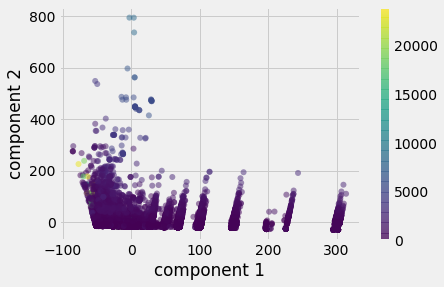

In [47]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2, random_state=42).fit(X_prod)
projected = pca.fit_transform(X_prod)
print("Shape of input", X_prod.shape)
print("Shape of PCA component", projected.shape)
print("Explained Variance", pca.explained_variance_ratio_)
print("Total variance explained by 2 PCA components is: ",np.cumsum(pca.explained_variance_ratio_))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_prod, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

Text(0.5,1,'Component-wise and Cumulative Explained Variance')

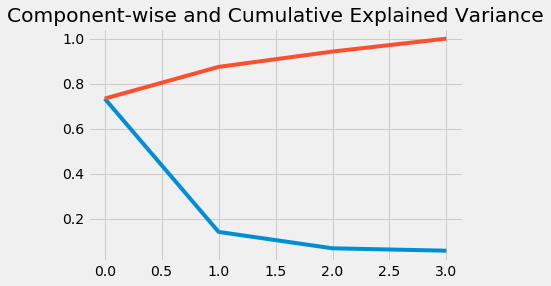

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_prod)

plt.plot(range(4), pca.explained_variance_ratio_)
plt.plot(range(4), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(projected, y_cust, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
X_normalizer = StandardScaler()

X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)


print("Shape of X train", X_train.shape)
print("Shape of X test", X_test.shape)
print("Shape of y train", y_train.shape)
print("Shape of y test", y_test.shape)

Shape of X train (43311, 2)
Shape of X test (10828, 2)
Shape of y train (43311, 1)
Shape of y test (10828, 1)


In [50]:
model_PCA_SGD = linear_model.SGDRegressor(alpha=0.0001, loss='squared_loss', max_iter=50, tol=0.01)

model_PCA_SGD.fit(X_train,y_train)
model_PCA_SGD.score(X_train,y_train)
predicted_SGD= model_PCA_SGD.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted_SGD))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted_SGD))
print('\n R-squared:', r2_score(y_test, predicted_SGD))


The model mean absolute error is:  0.17394113700831082

Mean Squared Error: 0.6567135915883332

 R-squared: 0.1435131335327935


In [51]:
from sklearn.svm import SVR
model_PCA_SVR = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

model_PCA_SVR.fit(X_train,y_train)
predicted= model_PCA_SVR.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("\nThe model mean absolute error is: ",mean_absolute_error(y_test,predicted_SGD))
print('\nMean Squared Error:', mean_squared_error(y_test, predicted_SGD))
print('\n R-squared:', r2_score(y_test, predicted_SGD))


The model mean absolute error is:  0.17394113700831082

Mean Squared Error: 0.6567135915883332

 R-squared: 0.1435131335327935
